In [1]:
import cv2 # To do image processing 
import numpy as np
import glob # To manipulate files
from PIL import Image # To display images
import os # To access files
import random # To create random numbers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # To display confusion matrix
import matplotlib.pyplot as plt # To make plots

In [2]:
# Importing drive for running in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Function to detect eyes:
def detect_open_eye(image, lower_white, upper_white, threshold):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the color range for the white of the eye. Transforms the tuples to np.arrays, which is needed.
    lower_white = np.array(lower_white)
    upper_white = np.array(upper_white)

    # Create a mask based on the color range
    mask = cv2.inRange(hsv_image, lower_white, upper_white)

    # Apply the mask to the image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert the masked image to grayscale
    gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

    # Calculate the proportion of white pixels in the grayscaled image:
    white_pixel_count = np.count_nonzero(gray_image) # Find the pixels that are white.
    total_pixel_count = gray_image.size # Find the total pixels in the image.
    white_pixel_ratio = white_pixel_count / total_pixel_count

    # Below is commented out to avoid spamming the terminal.
    ##. commented out: print("white_pixel_ratio: " + str(white_pixel_ratio))
    return white_pixel_ratio > threshold # Returns TRUE if the white_pixel_ratio is more than the threshold we set.

In [4]:
# This function is made for exploring the different steps of the image processing:
def vis_steps_in_image_processing(folderpath):
  
  # Saving the file names for all images in the folder and shuffle the list.
  image_list = os.listdir(folderpath) 
  random.shuffle(image_list) 

  # Join first image name in list and path to get full file path:
  image_path = os.path.join(folder_path, image_list[0])
  test_Img = cv2.imread(image_path) # Reads the image to be displayed.
  print("Original Image:", image_list[0]) 
  # Change color to correct RGB and display it:
  imageRGB = cv2.cvtColor(test_Img, cv2.COLOR_BGR2RGB) 
  print_original_image = Image.fromarray(imageRGB) 
  print_original_image.show()

  # Convert the image to HSV color space and display it:
  hsv_Img = cv2.cvtColor(test_Img, cv2.COLOR_BGR2HSV)
  print("HSV Image:")
  print_HSV_image = Image.fromarray(hsv_Img) 
  print_HSV_image.show()

  # Define the color range for the white of the eye:
  lower_white = np.array([0, 0, 45])
  upper_white = np.array([130, 30, 255])

  # Create a mask based on the color range and apply it to the image:
  mask = cv2.inRange(hsv_Img, lower_white, upper_white)
  masked_image = cv2.bitwise_and(test_Img, test_Img, mask=mask)

  # Display the image:
  print("Masked image:")
  print_masked_image = Image.fromarray(masked_image) #Using the Image package to assign a viewable image to a new variable.
  print_masked_image.show()

  # Convert the image to greyscale and display it:
  gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
  print("Grey-scaled image:")
  print_grey_image = Image.fromarray(gray_image)
  print_grey_image.show() 

Original Image: _710.jpg


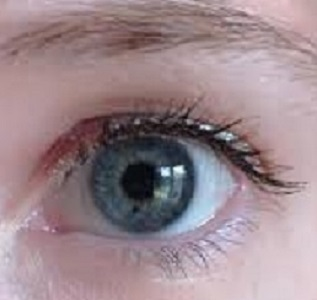

HSV Image:


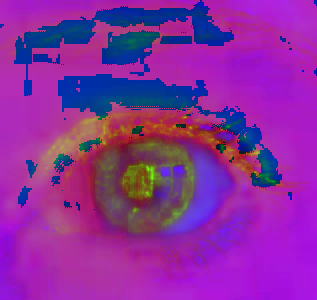

Masked image:


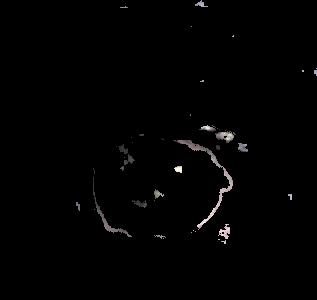

Grey-scaled image:


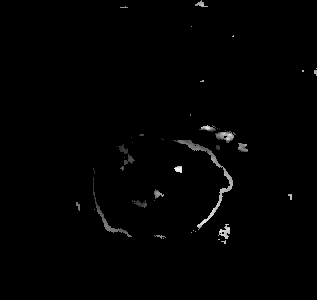

In [5]:
# Visualizing the different steps in the image processing with a random image from the test dataset of open eyes:
# Please update the folder_path to fit your directory:
folder_path = "/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/test/Open/"
vis_steps_in_image_processing(folder_path)

In [6]:
# Define function to create confusion matrix
def create_confusion_matrix(TN, FP, FN, TP):
  # Define the confusion matrix data
  confusion_matrix = np.array([[TN, FP], [FN, TP]])
  # Define the labels for the two different classes:
  class_labels = ['Closed', 'Open']

  # Create the confusion matrix display:
  cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)
  fig, ax = plt.subplots(figsize=(8, 6)) 

  # Plotting the confusion matrix:
  cm_display.plot(ax=ax, cmap='Blues')
  ax.set_title("Confusion Matrix")
  plt.show()

Now testing arrays: [0, 0, 20] [120, 30, 255] and threshold: 0.001
Total files in folder: 1234
Total correct predictions: 804 (65.15% accuracy)
Now testing arrays: [0, 0, 20] [120, 30, 255] and threshold: 0.01
Total files in folder: 1234
Total correct predictions: 779 (63.13% accuracy)
Now testing arrays: [0, 0, 20] [120, 30, 255] and threshold: 0.03
Total files in folder: 1234
Total correct predictions: 708 (57.37% accuracy)
Now testing arrays: [0, 0, 45] [130, 30, 255] and threshold: 0.001
Total files in folder: 1234
Total correct predictions: 817 (66.21% accuracy)
Now testing arrays: [0, 0, 45] [130, 30, 255] and threshold: 0.01
Total files in folder: 1234
Total correct predictions: 785 (63.61% accuracy)
Now testing arrays: [0, 0, 45] [130, 30, 255] and threshold: 0.03
Total files in folder: 1234
Total correct predictions: 714 (57.86% accuracy)
Now testing arrays: [0, 0, 70] [180, 50, 255] and threshold: 0.001
Total files in folder: 1234
Total correct predictions: 752 (60.94% accura

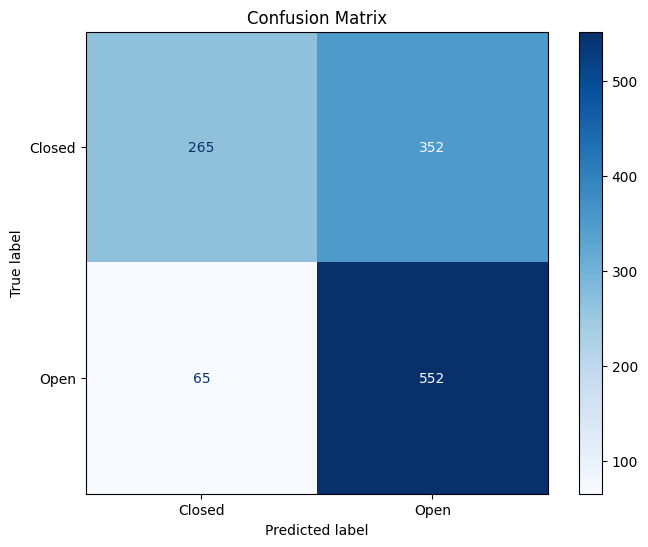

Precision: 0.611% )
Recall: 0.895% )
F1 Score: 0.726% )


In [7]:
# Now we try different color ranges and thresholds, to see which perform the best:

# Holds paths in Google Drive - one for closed and one for open eyes. 
# Please update the paths to fit your directory. The first element needs to include the Closed eyes, the second should store the open eyes.
paths = ["/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/train/Closed/*.*", 
         "/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/train/Open/*.*"]

# Define tuples for four types of lower_ & upper_white values (color ranges). This is needed for the manual "gridsearch":
# The below values have been chosen after a lot of iterations,  to best reflect the differences in accuracy.
values_sets = [
    ([0, 0, 20], [120, 30, 255]),
    ([0, 0, 45], [130, 30, 255]),
    ([0, 0, 70], [180, 50, 255]),
    ([20, 20, 210], [200, 60, 255]),
]

# Define array for different threshold values. This is needed for the manual "gridsearch":
threshold_values = [0.001, 0.01, 0.03]

# Define variable to save best scores and parameters:
best_score = float('-inf') 
best_parameters = None  

# For final confusion matrix:
FP = 0
TP = 0
TN = 0
FN = 0

# Loop through the different color ranges:
for lower_white, upper_white in values_sets:
  # Loop through the different threshold values: 
    for threshold in threshold_values:
        print("Now testing arrays: " + str(lower_white) + " " + str(upper_white) + " and threshold: " + str(threshold))
        
        #Variables to track correct predictions, total images & values for confusion matrix:
        matches = 0
        total_images = 0
        temp_TP = 0
        temp_FP = 0
        temp_TN = 0
        temp_FN = 0

      #Loops through both paths. This type of loop  allows us to access each index starting at 1 (will be used when counting matches!) :
        for i, path in enumerate(paths, start=1):
          
          # Add and assign the number of all images found in the currect path:
          total_images += len(glob.glob(path))

          # Loops each file found in the folder:
          for file in glob.glob(path):
            #Use cv2 to read the file and call function to detect open eyes:
            eye_image = cv2.imread(file)
            is_open = detect_open_eye(eye_image, lower_white, upper_white, threshold)

          #Displays prediction and logs correct matches:
          #OBS! I commented out the print statements, to not spam the terminal. In smaller tests, it can be nice to see predictions for each image!
            if is_open and i == 1: ## i == 1 means it's looping through closed eye images (first path in paths array)
              #print("Prediction: Eye is open")  
              matches = matches # The match is not correct, so the matches value stays unchanged :-)
              temp_FP += 1
            elif is_open and i == 2: ## i == 2 means it's looping through open eye images (second path in paths array)
              #print("Prediction: Eye is open")
              matches += 1 # The match is correct, so the matches value increases with 1! :-)
              temp_TP += 1
            elif not is_open and i == 1:
              #print("Prediction: Eye is closed")
              matches += 1
              temp_TN += 1
            else:
              #print("Prediction: Eye is closed")
              matches = matches
              temp_FN += 1

        # For each round of testing in both closed/open eye folders, the accuracy is calculated and displayed:
        print("Total files in folder: " + str(total_images))
        accuracy_percent = matches / total_images * 100
        print("Total correct predictions: " + str(matches) + " ({:.2f}% accuracy)".format(accuracy_percent))

        # The best score and parameters are saved:
        if accuracy_percent > best_score:
          best_score = accuracy_percent
          best_parameters = (threshold, lower_white, upper_white)
          FP = temp_FP
          TP = temp_TP
          TN = temp_TN
          FN = temp_FN

# Finally print the best accuracy and parameters:
print("----------")
print("Best Accuracy:", best_score)
print("----------")
print("With Parameters:", best_parameters)
print("Threshold: ", best_parameters[0])
print("Lower_white: ", best_parameters[1])
print("Upper_white: ", best_parameters[2])

# Display confusion matrix:
create_confusion_matrix(TN, FP, FN, TP)

# Calculate the Precision, Recall & F1-score:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision: {:.3f}% )".format(precision))
print("Recall: {:.3f}% )".format(recall))
print("F1 Score: {:.3f}% )".format(f1_score))

Total files in folder: 6
Total correct predictions: 4 (66.67% accuracy)


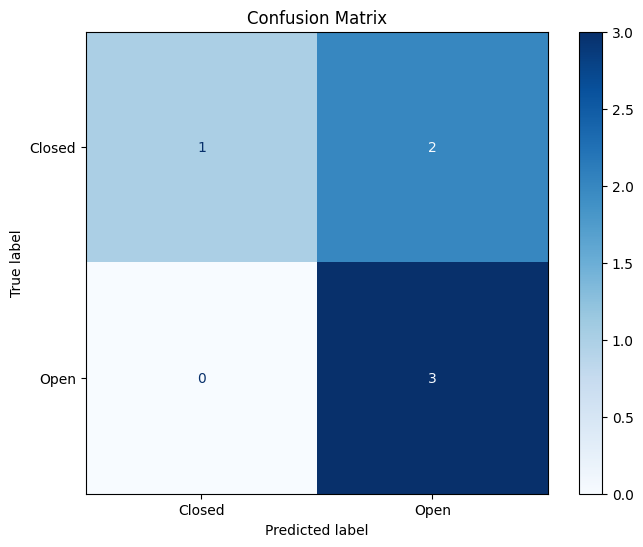

In [8]:
# Making predictions with the parameters from the highest accuracy model:

# Define paths holding predictions images (our own eyes)
paths = ["/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/predictions/Closed/*.*", 
         "/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/predictions/Open/*.*"]

# Define color range and threshold: 
lower_white = [0, 0, 45]
upper_white = [130, 30, 255]
threshold = 0.001

#Variable to track correct predictions and total images:
matches = 0
total_images = 0
temp_TP = 0
temp_FP = 0
temp_TN = 0
temp_FN = 0

      #Loops through both paths:
for i, path in enumerate(paths, start=1):
  total_images += len(glob.glob(path))

  # Loops each file found in the folder found in the path:
  for file in glob.glob(path):
    eye_image = cv2.imread(file)

    #Calls function to detect open eyes:
    is_open = detect_open_eye(eye_image, lower_white, upper_white, threshold)

  # Logs predictions:
    if is_open and i == 1: ## i == 1 means it's looping through closed eye images (first path in paths array.
      matches = matches # The match is not correct, so the matches value stays unchanged :-)
      temp_FP += 1
    elif is_open and i == 2: ## i == 2 means it's looping through open eye images (second path in paths array).
      matches += 1 # The match is correct, so the matches value increases with 1! :-)
      temp_TP += 1
    elif not is_open and i == 1:
      matches += 1
      temp_TN += 1
    else:
      matches = matches
      temp_FN += 1

print("Total files in folder: " + str(total_images))
accuracy_percent = matches / total_images * 100
print("Total correct predictions: " + str(matches) + " ({:.2f}% accuracy)".format(accuracy_percent))

# Display confusion matrix:
create_confusion_matrix(temp_TN, temp_FP, temp_FN, temp_TP)

Original Image: IMG_1264.jpg


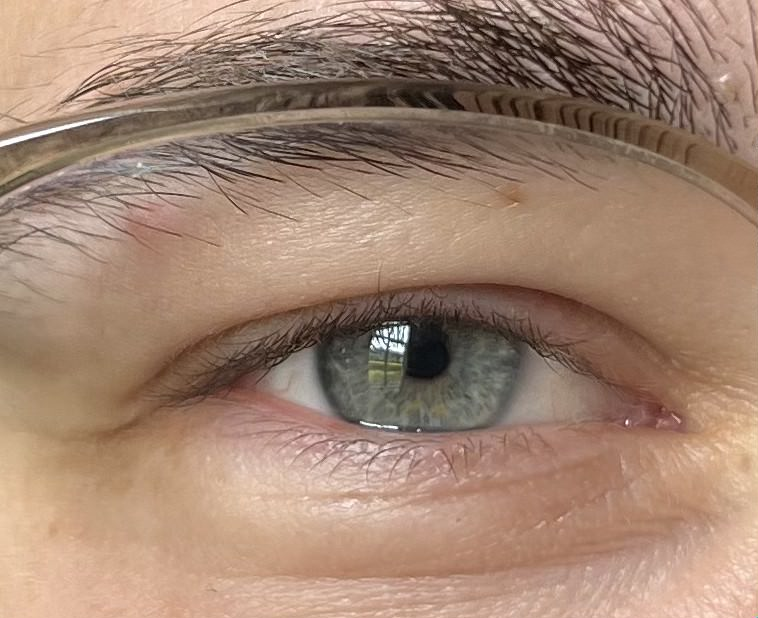

HSV Image:


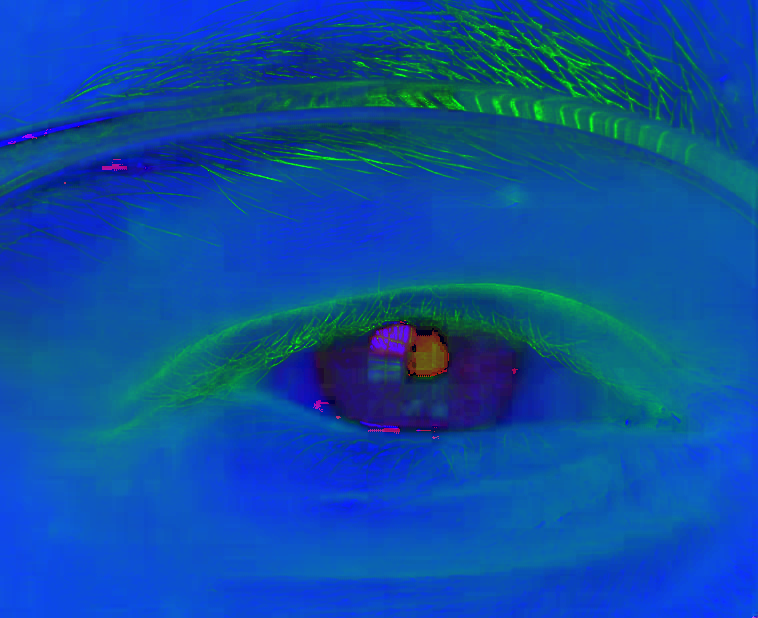

Masked image:


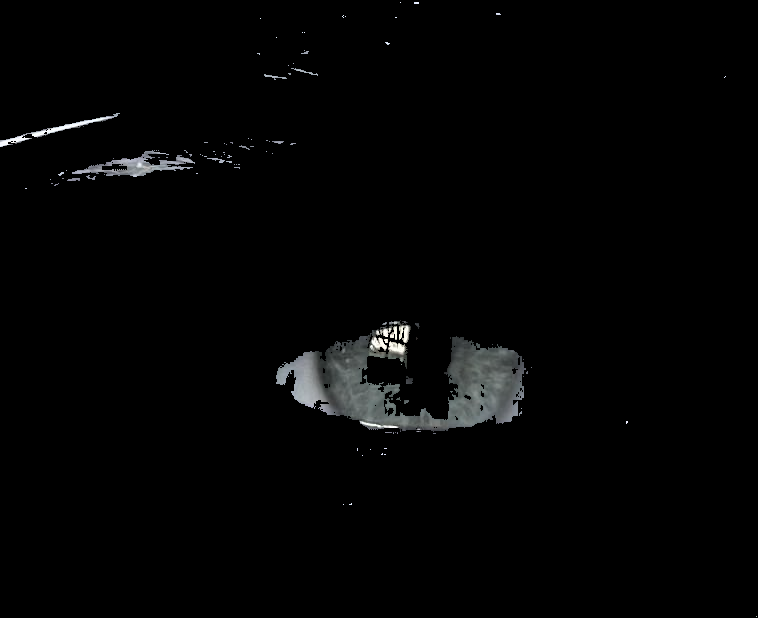

Grey-scaled image:


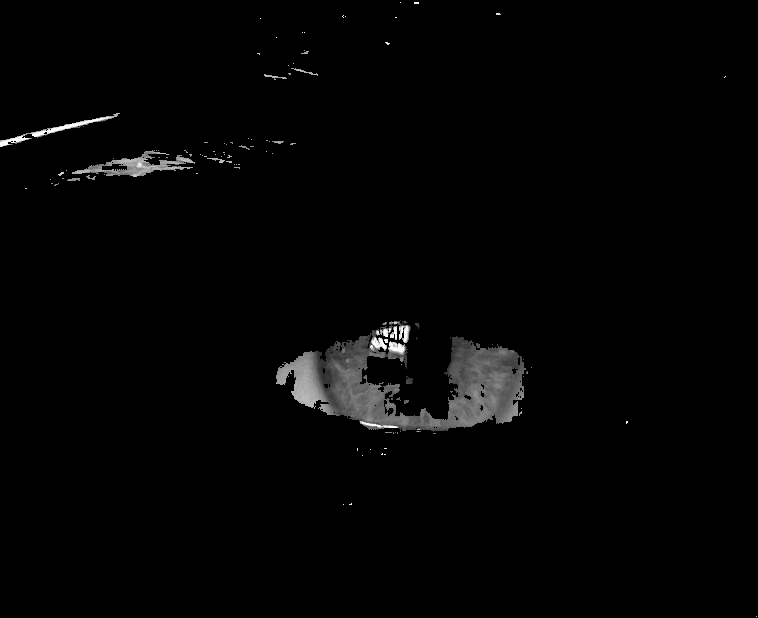

In [9]:
# Visualizing the image processing steps for a random open-eyed prediction image: 
folder_path = "/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/predictions/Open/"
vis_steps_in_image_processing(folder_path)